# Analyzing Data

## Helicopter Prison Escapes

In which year did the most helicopter prison break attempts occur?

In which countries do the most attempted helicopter prison escapes occur?

To start off, we are going to import helper functions which were already prepared.

In [15]:
from helper import *

## Get Data
Next, we are going to directly import hte data from the wikipedia article. It is important to know that results may vary as wikipedia pages are constatly updated. 

In [16]:
url = "https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts"
data = data_from_url("https://en.wikipedia.org/wiki/List_of_helicopter_prison_escapes#Actual_attempts")

In order to clean the output of the three rows of data we want to view we must first create a new variable called index with a value of 0. Next, create a for loop that iterates through the data while taking the index into account and then excluding the last element of the table. Then we have to increment the index in each loop iteration. 

In [17]:
index = 0 
for row in data:
    data[index] = row[:-1]
    index += 1

The next step is to implement a for loop to print the first three rows of the list of lists stored in data. We will do that by calling each row in the data[;3] first three rows and printing them.

In [18]:
for row in data[:3]:
    print(row)

['August 19, 1971', 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
['October 31, 1973', 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"]
['May 24, 1978', 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']


## Get the Year
The data set is seperated by commas (,). We want to modify the yeat information by using the helper function fetch_year() - which takes a date string as input and extracts the year. 

To do this we must itterate through each row and replace the first element [0] with the year. 

In [19]:
for row in data: 
    row[0] = fetch_year(row[0])

To make sure it worked, we will use the for loop we already had and print out the first three rows. 

In [20]:
for row in data[:3]:
    print(row)

[1971, 'Santa Martha Acatitla', 'Mexico', 'Yes', 'Joel David Kaplan Carlos Antonio Contreras Castro']
[1973, 'Mountjoy Jail, Dublin', 'Ireland', 'Yes', "JB O'Hagan Seamus Twomey Kevin Mallon"]
[1978, 'United States Penitentiary, Marion, Illinois', 'United States', 'No', 'Garrett Brock Trapnell Martin Joseph McNally James Kenneth Johnson']


## Attemps per Year


First we have to figure out the earliest and latest years of an attempt. We are going to use a lambda function to find said years.

- min_year - the variable name
- max_year - the variable name

- min(data, key = lambada...) - will find the minimum value in and iterable based on a given key function.
- max(data, key = lambada...) - will find the maximum value in and iterable based on a given key function

- (... = lambda x: x[0])[0] - we are calling on the iterable list(data) to compare only the first element (x[0]) in each row of data.

In [21]:
min_year = min(data, key=lambda x: x[0])[0]
max_year = max(data, key=lambda x: x[0])[0]

We must also generate a list of all the years between min and max. First, lets create an empty list. We can use a for loop with a range of the min_year and max_year variable outputs. Now we can call on the empty list (years) and append each year in range of min and max.

Note: For max_year we must +1 because the function stops one step before the end value!

In [22]:
years = []
for year in range(min_year, max_year + 1):
    years.append(year)

Lets print our list to make sure everything is in order.

In [23]:
print(years)

[1971, 1972, 1973, 1974, 1975, 1976, 1977, 1978, 1979, 1980, 1981, 1982, 1983, 1984, 1985, 1986, 1987, 1988, 1989, 1990, 1991, 1992, 1993, 1994, 1995, 1996, 1997, 1998, 1999, 2000, 2001, 2002, 2003, 2004, 2005, 2006, 2007, 2008, 2009, 2010, 2011, 2012, 2013, 2014, 2015, 2016, 2017, 2018, 2019, 2020]


Now that we know the years, we can create a variable (attempts_per_year) to start creating a list comprehension where we will ultimatley be able to input both the year and attempts. Lets leave attemps as

In [24]:
attempts_per_year = [[year,0] for year in years]

Lets make a nested loop. This code counts how many times each year appears in data (you know, the list of data from the url)and updates attempts_per_year respectively.
- It will iterate through each row of data. 
- Then for each iteration of data it will also iterate through all the rows (year_attempt) in attempts_per_year. 
- We must calrify that the year is the first index [0] in year_attempt. Which is why we are assigning year_attempt[0] to year. 
- If condition is checking that that the year (row[0]) in the data list matches the year in attempts_per_year. 
- Then for each time that the years DO match we will add one count to the second index of year_attempt [1]. 
- Lastly, we must print our list, attempts_per_year.


In [25]:
for row in data:
    for year_attempt in attempts_per_year: 
        year = year_attempt[0]
        if row[0] == year:
            year_attempt[1] += 1

print(attempts_per_year)

[[1971, 1], [1972, 0], [1973, 1], [1974, 0], [1975, 0], [1976, 0], [1977, 0], [1978, 1], [1979, 0], [1980, 0], [1981, 2], [1982, 0], [1983, 1], [1984, 0], [1985, 2], [1986, 3], [1987, 1], [1988, 3], [1989, 2], [1990, 1], [1991, 1], [1992, 2], [1993, 1], [1994, 0], [1995, 0], [1996, 1], [1997, 1], [1998, 0], [1999, 1], [2000, 2], [2001, 3], [2002, 2], [2003, 1], [2004, 0], [2005, 2], [2006, 1], [2007, 3], [2008, 0], [2009, 3], [2010, 1], [2011, 0], [2012, 1], [2013, 2], [2014, 1], [2015, 0], [2016, 1], [2017, 0], [2018, 1], [2019, 0], [2020, 1]]


### In which year did the most attempts at breaking out of prison with a helicopter occur? 
Well lets visualize it by creating a barplot.
- By using the %matplotlib inline command. This command displays any matplotlib directly in the notebook. 
- barplot(attempts_per_year) calls the function named barplot and passes the argument attempts_per_year.

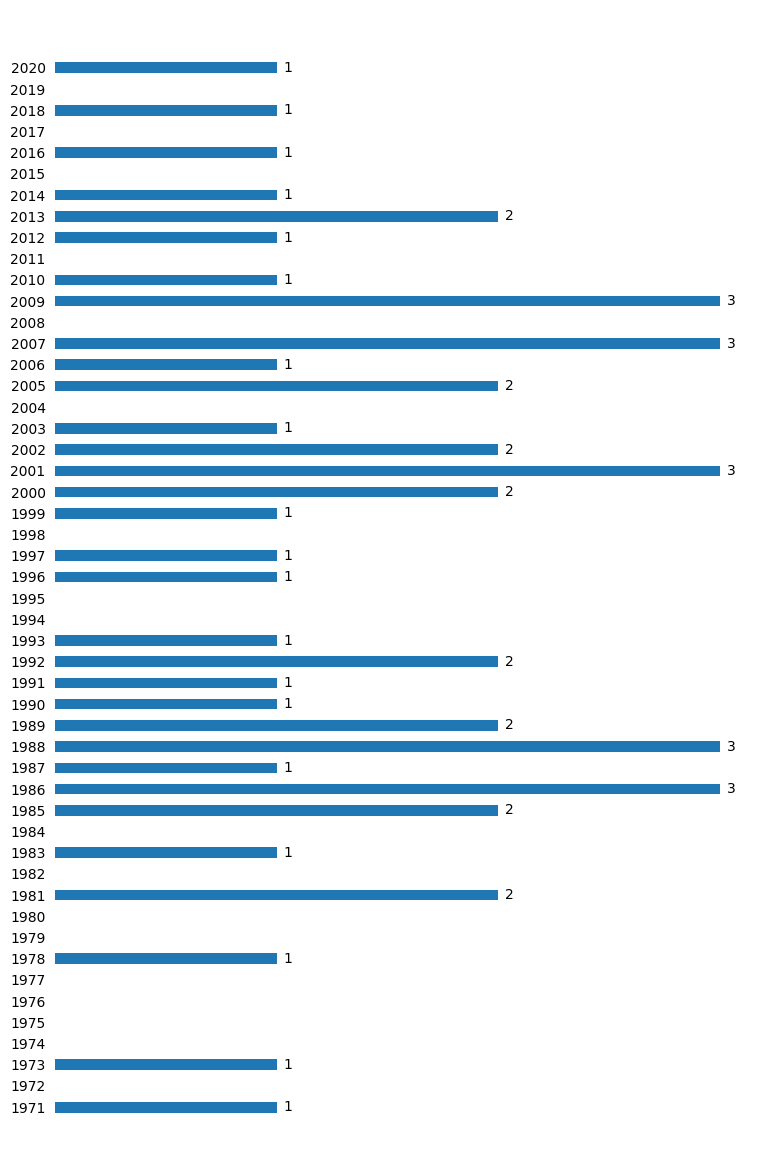

In [26]:
%matplotlib inline
barplot(attempts_per_year)

So, as we can see 1986, 1988, 2001, 2007, and 2009 all have 6 attempted helicopter escapes. 

Maybe you could figure out how to code a few lines that wrtie it out simply. You just have to find a way to pick the second index and have the code evaulate that!

### In which countries do the most attempted helicopter prison escapes occur?

To find out:
- Count the frequency of each unique country in the "Country" colum of the DataFrame (df) defined in the helper.py folder.
- The .value_counts() method counts the occurances of each unique value in the selected column and returns a series with the counts.

Not: helper.py has imported Pandas an can therefor do this. 

In [27]:
countries_frequency = df["Country"].value_counts()

Now lets use a helper function defined in helper.py to display our information.

In [29]:
print_pretty_table(countries_frequency)

Country,Number of Occurrences
France,15
United States,8
Canada,4
Belgium,4
Greece,4
United Kingdom,2
Brazil,2
Australia,2
Colombia,2
Italy,1
